## Image classification using CNN (CIFAR10 dataset) | Deep Learning

Tutorial: https://www.youtube.com/watch?v=7HPwo4wnJeA&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=24

#### Small Image Classification Using Convolutional Neural Network (CNN)
In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

### 1) Import librairies

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# data set images cifar10
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 21s 0us/step


### 2) Data Exploration

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
# 3D image
X_test.shape

(10000, 32, 32, 3)

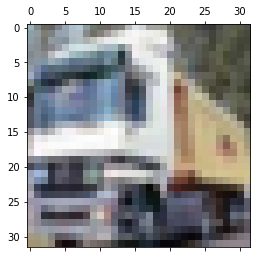

In [9]:
#  Dispaly image (number one)
# The X_train contien number (matrix of number between 0 and 255)
plt.matshow(X_train[1])

In [10]:
# Reshape y_train et y_test 

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
# display image with label
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

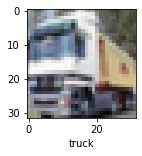

In [12]:
# call function and display image
plot_sample(X_train, y_train, 1)


### Normalization of images

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
# Test the classification directly without going through the extraction features steps

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.9348 - accuracy: 0.2990
Epoch 2/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.6430 - accuracy: 0.4211
Epoch 3/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5501 - accuracy: 0.4546
Epoch 4/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4875 - accuracy: 0.4761
Epoch 5/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4412 - accuracy: 0.4952


You can see that at the end of 5 epochs, accuracy is at around 49.52%

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.62      0.57      1000
           1       0.64      0.56      0.60      1000
           2       0.32      0.47      0.38      1000
           3       0.36      0.39      0.37      1000
           4       0.42      0.39      0.40      1000
           5       0.57      0.19      0.28      1000
           6       0.47      0.60      0.53      1000
           7       0.69      0.40      0.51      1000
           8       0.70      0.55      0.62      1000
           9       0.47      0.69      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.52      0.49      0.48     10000
weighted avg       0.52      0.49      0.48     10000



## 3) Build a convolutional neural network to train our images

In [18]:
# Build CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
# Compile model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Fit model with 10 epochs
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0062 - accuracy: 0.6486
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9250 - accuracy: 0.6787
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8623 - accuracy: 0.7010
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8091 - accuracy: 0.7179
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7661 - accuracy: 0.7348
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7233 - accuracy: 0.7498
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6897 - accuracy: 0.7611
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6554 - accuracy: 0.7712
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6250 - accuracy: 0.7802
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l

#### With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9235 - accuracy: 0.6971


[0.9235489368438721, 0.6970999836921692]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[9.7035425e-04, 4.5832262e-06, 3.7583264e-03, 7.6630163e-01,
        7.1443920e-04, 1.4259653e-01, 2.2886388e-02, 3.1036885e-05,
        6.2568158e-02, 1.6858337e-04],
       [1.9431949e-02, 4.2448927e-02, 5.4817720e-05, 1.1310788e-05,
        1.3493166e-06, 1.1272612e-07, 8.8420023e-08, 9.5262273e-08,
        9.3702555e-01, 1.0258039e-03],
       [1.3503260e-02, 4.4067595e-02, 2.1863091e-03, 1.4435187e-02,
        1.2125936e-03, 7.9793442e-04, 9.2649134e-05, 1.3945112e-04,
        8.9363188e-01, 2.9933147e-02],
       [8.9716899e-01, 9.9913143e-03, 1.0144958e-02, 8.7690895e-04,
        8.4346515e-04, 3.6371327e-06, 1.3967742e-04, 1.4667601e-05,
        8.0769099e-02, 4.7374244e-05],
       [4.0261434e-06, 3.1075939e-05, 5.3206701e-02, 8.5409015e-02,
        2.0152690e-01, 2.7920271e-03, 6.5437984e-01, 7.7263849e-07,
        2.6436762e-03, 5.8495411e-06]], dtype=float32)

In [31]:
# Prediction for 5 images
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:15]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 3, 7, 9]

In [32]:
# test for 5 images
y_test[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

on remarque que 14 images sont bien classifier et la 13eme image mal classifier 

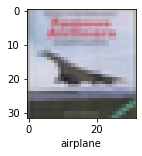

In [33]:
plot_sample(X_test, y_test,3)

In [34]:
# classification de CNN 
classes[y_classes[3]]

'airplane'

notre model a bien classé l"image Airplan